<a href="https://colab.research.google.com/github/Anjana-0/HealthCare_Project_Full_Code.ipynb/blob/main/HealthCare_Project_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOLUTION CODE PART 1

In [4]:
from google.colab import files
import pandas as pd
import io
import numpy as np

# Upload the dataset
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving diabetes.csv to diabetes.csv


In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [5]:
#TASK 1 - Use a KNN approach to fill in for the missing values - this should be much better than the standard approaches of using the average or the most frequent value

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Assuming 'df' is your DataFrame with the columns specified
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns])
df_scaled = pd.DataFrame(df_scaled, columns=columns)

# Imputing missing values using KNN
imputer = KNNImputer(n_neighbors=5)  # Using 5 neighbors for simplicity
df_scaled_imputed = imputer.fit_transform(df_scaled)
df_scaled_imputed = pd.DataFrame(df_scaled_imputed, columns=columns)

df.update(df_scaled_imputed)

<ipython-input-5-e54cee41956c>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 8.48323795e-01 -1.12339636e+00  1.94372388e+00 -9.98207780e-01
  5.04055196e-01 -1.53184856e-01 -1.34247638e+00 -1.84482001e-01
  2.38188392e+00  1.28489452e-01 -3.40967728e-01  1.47426670e+00
  5.66649487e-01  2.13150675e+00  1.41167241e+00 -6.53939181e-01
 -9.05905652e-02 -4.34859164e-01 -5.60047745e-01 -1.84482001e-01
  1.59786597e-01 -6.85236326e-01  2.35058677e+00 -5.92934199e-02
  6.91838068e-01  1.28489452e-01  8.17026649e-01 -7.47830617e-01
  7.54432359e-01 -1.21887711e-01 -3.72264873e-01  1.16129525e+00
 -1.02950492e+00 -9.04316344e-01  3.45980161e-02 -5.60047745e-01
  5.35352341e-01 -5.91344890e-01 -9.66910634e-01 -3.09670582e-01
  1.84983245e+00  3.78866615e-01 -4.66156309e-01  1.56815814e+00
  1.19259239e+00  1.84983245e+00  7.85729504e-01 -1.56155640e+00
 -5.60047745e-01 -4.97453454e-01 -5.60047745e-01 -6.22642036e-01
 -

In [6]:
#TASK 2 - Preprocess the dataset - encode the output as -1 or 1, and standardize the input features - train a logistic regression model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming 'df' is your DataFrame and 'Outcome' is the target variable

# Step 1: Encode the Outcome
df['Outcome'] = df['Outcome'].replace({0: -1, 1: 1})

# Step 2: Standardize the Input Features (excluding 'Outcome')
features = df.columns.drop('Outcome')
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Outcome'], test_size=0.3, random_state=0)
class_weights = {-1: 1, 1: 1}
# Step 4: Initialize and train the Logistic Regression model
model = LogisticRegression(class_weight=class_weights)

# Initialize the Random Forest model with balanced class weights
# model = RandomForestClassifier(n_estimators = 200, class_weight=class_weights)
model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the model accuracy and the confusion matrix
print("Accuracy of the Logistic Regression model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy of the Logistic Regression model: 0.7792207792207793
Confusion Matrix:
 [[141  16]
 [ 35  39]]


Accuracy: 0.7792207792207793
Confusion Matrix:
 [[141  16]
 [ 35  39]]
Precision: 0.7090909090909091
Recall: 0.527027027027027
ROC AUC: 0.8362885178171803


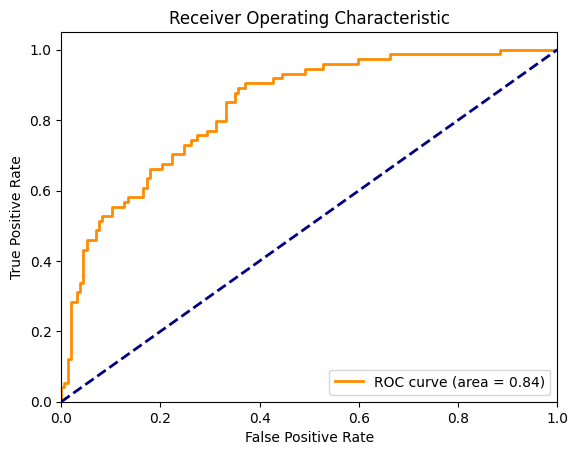

In [7]:
#TASK 3 - Report accuracy, confusion matrix, precision, recall, ROC - along with their meanings and what the imply. Also note how features affect the outcome in Logistic Regression

from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculating precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Calculate ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Display all metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [8]:
#identifying how variables affect the outcome
# Getting the coefficients of the features
feature_importance = pd.DataFrame(model.coef_[0], index=features, columns=['Coefficient'])
print(feature_importance.sort_values(by='Coefficient', ascending=False))

                          Coefficient
Glucose                      1.069830
BMI                          0.695128
Age                          0.289568
Pregnancies                  0.288354
DiabetesPedigreeFunction     0.250617
SkinThickness                0.093469
Insulin                     -0.138898
BloodPressure               -0.218241


SKELETON CODE PART 1



In [ ]:
from google.colab import files
import pandas as pd
import io
import numpy as np

# Upload the dataset
uploaded = files.upload()  # User is prompted to upload the file

# Get the name of the first (and should be only) file in the uploaded files dictionary
filename = next(iter(uploaded))

# Load the dataset into a pandas DataFrame using the dynamically determined filename
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# TASK 1: Exploratory Data Analysis (EDA)




# TASK 2: Replace zero values with NaN in specific columns (0 means no data but NaN is not given)
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] =



from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns])
df_scaled = pd.DataFrame(df_scaled, columns=columns)

# TASK 3: Impute missing values using KNN
# Hint: Use KNNImputer to fill in the missing values
imputer =
df_scaled_imputed =

df_scaled_imputed = pd.DataFrame(df_scaled_imputed, columns=columns)
df.update(df_scaled_imputed)




from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Encode the Outcome
df['Outcome'] = df['Outcome'].replace({0: -1, 1: 1})

# Step 2: Standardize the Input Features (excluding 'Outcome')
features = df.columns.drop('Outcome')
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# TASK 4: Split the data into training and testing sets and set class_weights
# Hint: Use train_test_split to split the data
X_train, X_test, y_train, y_test =
class_weights = {-1: 1, 1: 1}


# TASK 5: Initialize the Logistic Regression model
model =

#TASK 6: Fit the data on the model


# TASK 7: Make predictions and evaluate the model
# Hint: Use model.predict to make predictions and accuracy_score to evaluate
y_pred =
accuracy =
conf_matrix =

# Print the model accuracy and the confusion matrix
print("Accuracy of the Logistic Regression model:", accuracy)
print("Confusion Matrix:\\n", conf_matrix)

from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculating precision and recall
# TASK 8: Calculate precision and recall
precision =
recall =

# Calculate ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Display all metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Identifying how variables affect the outcome
# Getting the coefficients of the features
feature_importance = pd.DataFrame(model.coef_[0], index=features, columns=['Coefficient'])
print(feature_importance.sort_values(by='Coefficient', ascending=False))


# TASK 9: Given the results and feature importances, reconfigure the class weights and see how the results are changing. Make sure you understand it.
#Also, based on the feature weights, what insights can you draw?


SOLUTION CODE PART 2

In [ ]:
import requests
import zipfile
import io
import pandas as pd

zip_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip"

# Send a HTTP request to the URL
response = requests.get(zip_url)
# Check if the request was successful
if response.status_code == 200:
    # Open the ZIP file
    with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
        # Extract 'diabetic_data.csv' and load it into a DataFrame
        with thezip.open('dataset_diabetes/diabetic_data.csv') as myfile:
            df_actual = pd.read_csv(myfile)
else:
    print("Failed to download the file")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fill missing values in 'A1Cresult' with 'none'
df_actual['A1Cresult'] = df_actual['A1Cresult'].fillna('none')

# Grouping primary diagnosis codes into broader categories
def categorize_diag(diag):
    if diag.startswith('250'):
        return 'Diabetes'
    elif diag.startswith(('390', '459')):
        return 'Circulatory'
    elif diag.startswith(('460', '519')):
        return 'Respiratory'
    else:
        return 'Other'

df_actual['diag_group'] = df_actual['diag_1'].apply(categorize_diag)

# Bivariate Analysis: HbA1c vs Medication Change
a1c_med_change = pd.crosstab(df_actual['A1Cresult'], df_actual['change'], normalize='index')
print("\nA1Cresult vs Medication Change:\n", a1c_med_change)

# Analysis: Measured vs Not Measured HbA1c and Medication Change
df_actual['A1C_measured'] = df_actual['A1Cresult'].apply(lambda x: 'Measured' if x != 'none' else 'Not Measured')
a1c_measured_med_change = pd.crosstab(df_actual['A1C_measured'], df_actual['change'], normalize='index')
print("\nA1C Measured vs Medication Change:\n", a1c_measured_med_change)

# Analysis: Measured vs Not Measured HbA1c and Readmission
a1c_measured_read = pd.crosstab(df_actual['A1C_measured'], df_actual['readmitted'], normalize='index')
print("\nA1C Measured vs Readmission:\n", a1c_measured_read)

# Trivariate Analysis: A1C Measured vs Readmission stratified by Primary Diagnosis
a1c_measured_read_diag = pd.crosstab([df_actual['A1C_measured'], df_actual['diag_group']], df_actual['readmitted'], normalize='index')
print("\nA1C Measured vs Readmission stratified by Primary Diagnosis:\n", a1c_measured_read_diag)

In [ ]:
# Plotting the results
plt.figure(figsize=(14, 6))

# Heatmap for HbA1c vs Medication Change
plt.subplot(2, 2, 1)
sns.heatmap(a1c_med_change, annot=True, cmap='viridis')
plt.title('HbA1c vs Medication Change')
plt.xlabel('Medication Change')
plt.ylabel('HbA1c Result')

# Heatmap for HbA1c Measured vs Medication Change
plt.subplot(2, 2, 2)
sns.heatmap(a1c_measured_med_change, annot=True, cmap='viridis')
plt.title('HbA1c Measured vs Medication Change')
plt.xlabel('Medication Change')
plt.ylabel('HbA1c Measured')

plt.tight_layout()
plt.show()

# Clustered Bar Plot for HbA1c Measured vs Readmission
a1c_measured_read.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 5))
plt.title('HbA1c Measured vs Readmission')
plt.xlabel('HbA1c Measured')
plt.ylabel('Proportion')
plt.legend(title='Readmission')
plt.show()


# Clustered Bar Plot for A1C Measured vs Readmission stratified by Primary Diagnosis
a1c_measured_read_diag.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('A1C Measured vs Readmission stratified by Primary Diagnosis')
plt.xlabel('HbA1c Measured and Primary Diagnosis')
plt.ylabel('Proportion')
plt.legend(title='Readmission')
plt.show()


SKELETON CODE PART 2

In [ ]:
import requests
import zipfile
import io
import pandas as pd

zip_url = "<https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip>"

# Send a HTTP request to the URL
response = requests.get(zip_url)
# Check if the request was successful
if response.status_code == 200:
    # Open the ZIP file
    with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
        # Extract 'diabetic_data.csv' and load it into a DataFrame
        with thezip.open('dataset_diabetes/diabetic_data.csv') as myfile:
            df_actual = pd.read_csv(myfile)
else:
    print("Failed to download the file")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fill missing values in 'A1Cresult' with 'none'
df_actual['A1Cresult'] = df_actual['A1Cresult'].fillna('none')

# Grouping primary diagnosis codes into broader categories
def categorize_diag(diag):
    if diag.startswith('250'):
        return 'Diabetes'
    elif diag.startswith(('390', '459')):
        return 'Circulatory'
    elif diag.startswith(('460', '519')):
        return 'Respiratory'
    else:
        return 'Other'

df_actual['diag_group'] = df_actual['diag_1'].apply(categorize_diag)

# TASK 10 - Bivariate Analysis: HbA1c vs Medication Change
# Hint: Use pd.crosstab to create the crosstab
a1c_med_change =
print("\\nA1Cresult vs Medication Change:\\n", a1c_med_change)

df_actual['A1C_measured'] = df_actual['A1Cresult'].apply(lambda x: 'Measured' if x != 'none' else 'Not Measured')
a1c_measured_med_change = pd.crosstab(df_actual['A1C_measured'], df_actual['change'], normalize='index')
print("\\nA1C Measured vs Medication Change:\\n", a1c_measured_med_change)
#TASK 11 - Report your results in the above two analyses


# TASK 12 - Analysis: Measured vs Not Measured HbA1c and Readmission
a1c_measured_read =
print("\\nA1C Measured vs Readmission:\\n", a1c_measured_read)

# Plotting the results
plt.figure(figsize=(14, 6))


plt.subplot(2, 2, 1)
sns.heatmap(a1c_med_change, annot=True, cmap='viridis')
plt.title('HbA1c vs Medication Change')
plt.xlabel('Medication Change')
plt.ylabel('HbA1c Result')


plt.subplot(2, 2, 2)
sns.heatmap(a1c_measured_med_change, annot=True, cmap='viridis')
plt.title('HbA1c Measured vs Medication Change')
plt.xlabel('Medication Change')
plt.ylabel('HbA1c Measured')

plt.tight_layout()
plt.show()


a1c_measured_read.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 5))
plt.title('HbA1c Measured vs Readmission')
plt.xlabel('HbA1c Measured')
plt.ylabel('Proportion')
plt.legend(title='Readmission')
plt.show()
